<a href="https://colab.research.google.com/github/SoA-Lee/Moon-Study/blob/master/Boston_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**보스턴 주택 가격 예측** 

In [ ]:
#기본 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#sklearn 데이터셋에서 보스턴 주택 데이터셋 로딩
from sklearn import datasets
housing = datasets.load_boston()

#딕셔너리 형태이므로 key값 확인
housing.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [ ]:
#판다스 데이터프레임으로 변환
data = pd.DataFrame(housing['data'],columns=housing['feature_names'])
target = pd.DataFrame(housing['target'],columns=['Target'])

#데이터셋 크기
print(data.shape)
print(target.shape)

(506, 13)
(506, 1)


In [ ]:
#데이터프레임 결합
df = pd.concat([data,target],axis=1)
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


In [ ]:
#데이터프레임의 기본정보
df.info()

#결측값 확인
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Target     0
dtype: int64

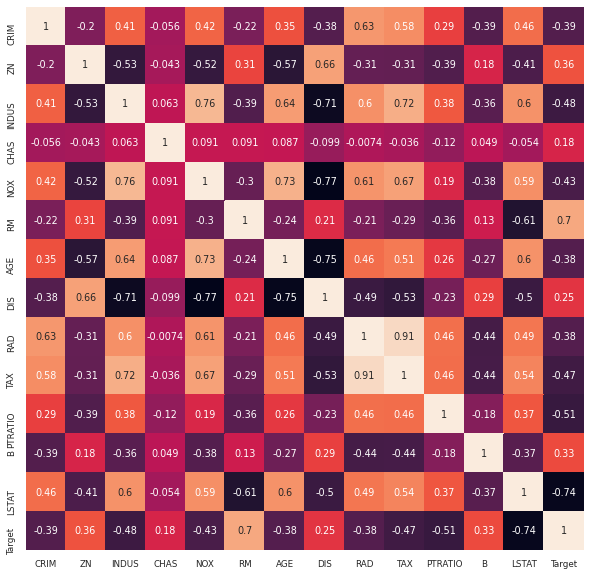

In [ ]:
#상관관계 행렬
df_corr=df.corr()

#히트맵 그리기(cbar는 색상표 표시여부)
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr,annot=True,cbar=False);
plt.show()

In [ ]:
#변수 간의 상관 관계 분석-Target 변수와 상관 관계가 높은 순서대로 정리
corr_order = df.corr().loc[:'LSTAT','Target'].abs().sort_values(ascending=False)
corr_order

LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: Target, dtype: float64

In [ ]:
#시각화로 분석할 피처 선택 추출 - Target 변수와 상관 관계가 높은 4개 변수
plot_cols = ['Target','LSTAT','RM','PTRATIO','INDUS']
plot_df = df.loc[:,plot_cols]
plot_df.head()

,Target,LSTAT,RM,PTRATIO,INDUS
0,24.0,4.98,6.575,15.3,2.31
1,21.6,9.14,6.421,17.8,7.07
2,34.7,4.03,7.185,17.8,7.07
3,33.4,2.94,6.998,18.7,2.18
4,36.2,5.33,7.147,18.7,2.18


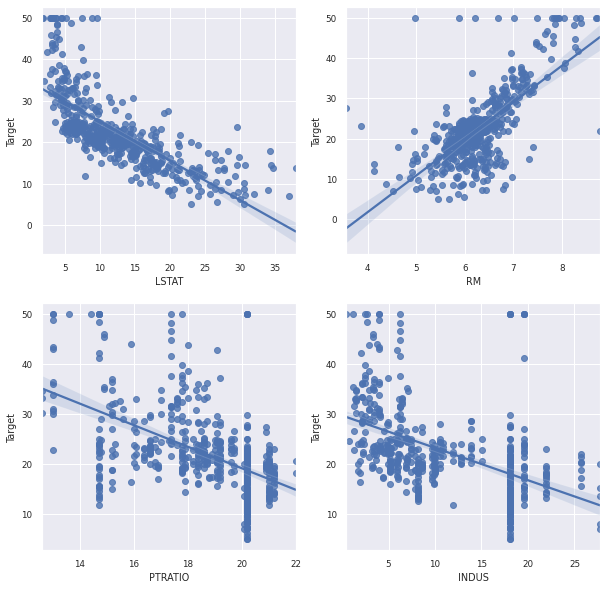

In [ ]:
#regplot 선형 회귀선을 산점도에 표시
plt.figure(figsize=(10,10))
for idx, col in enumerate(plot_cols[1:]):
  ax1 = plt.subplot(2,2,idx+1)
  sns.regplot(x=col,y=plot_cols[0],data=plot_df,ax=ax1)
plt.show()

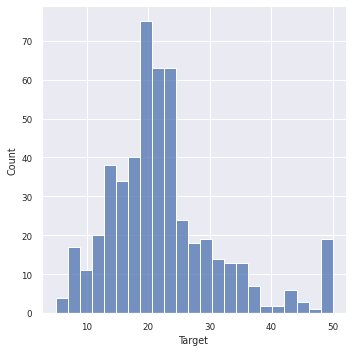

In [ ]:
#Target 데이터 분포(주택 가격)
sns.displot(x='Target',kind='hist',data=df)
plt.show()

In [ ]:
#사이킷런 MinMaxScaler 적용
#피쳐스케일링(데이터 전처리과정 및 정규화)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_scaled = df.iloc[:,:-1]
scaler.fit(df_scaled)
df_scaled = scaler.transform(df_scaled)

#스케일링 변환된 값을 데이터프레임에 반영
df.iloc[:,:-1] = df_scaled[:,:]
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,24.0
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,21.6
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,34.7
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,33.4
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,36.2


In [ ]:
#학습-테스트 데이터셋 분할
from sklearn.model_selection import train_test_split
X_data = df.loc[:,['LSTAT','RM']]
Y_data = df.loc[:,'Target']
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.2,shuffle=True,random_state=12)
print(X_train.shape, Y_train.shape)
print(X_test.shape,Y_test.shape)

(404, 2) (404,)
(102, 2) (102,)


In [ ]:
#선형 회귀 모형
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)

print("회귀계수(기울기):",np.round(lr.coef_,1))
print("상수항(절편):",np.round(lr.intercept_,1))


회귀계수(기울기): [-23.2  25.4]
상수항(절편): 16.3


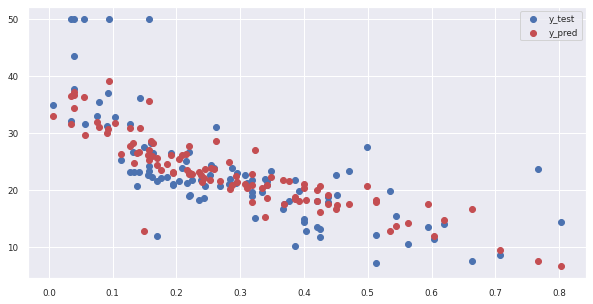

In [ ]:
#예측
y_test_pred = lr.predict(X_test)

#예측값, 실제값의 분포
plt.figure(figsize=(10,5))
plt.scatter(X_test['LSTAT'],Y_test,label='y_test')
plt.scatter(X_test['LSTAT'],y_test_pred,c='r',label='y_pred')
plt.legend(loc='best')
plt.show()

In [ ]:
#평가
from sklearn.metrics import mean_squared_error
y_train_pred = lr.predict(X_train)

train_mse = mean_squared_error(Y_train,y_train_pred)
print("Train MSE:%.4f" %train_mse)

test_mse = mean_squared_error(Y_test,y_test_pred)
print("Test MSE: %.4f" %test_mse)

Train MSE:30.8042
Test MSE: 29.5065


In [ ]:
#cross_val_score 함수
from sklearn.model_selection import cross_val_score
lr = LinearRegression()
mse_scores = -1*cross_val_score(lr,X_train,Y_train,cv=5, scoring = 'neg_mean_squared_error')
print("개별 Fold의 MSE:", np.round(mse_scores,4))
print("평균 MSE:%.4f" %np.mean(mse_scores))

개별 Fold의 MSE: [31.465  34.668  28.9147 29.3535 34.6627]
평균 MSE:31.8128
